In [21]:
import pandas as pd

data = pd.read_csv('/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/raw/sickness_table.csv')
print(data.head())
print(data.dtypes)
data['calls'] = data['calls'].astype(float).astype(int)
data['sby_need'] = data['calls'].astype(float).astype(int)
data['dafted'] = data['calls'].astype(float).astype(int)
data['date'] = pd.to_datetime(data['date'])
print(data.head())
print(data.dtypes)
data = data.sort_values(by='date')

   Unnamed: 0        date  n_sick   calls  n_duty  n_sby  sby_need  dafted
0           0  2016-04-01      73  8154.0    1700     90       4.0     0.0
1           1  2016-04-02      64  8526.0    1700     90      70.0     0.0
2           2  2016-04-03      68  8088.0    1700     90       0.0     0.0
3           3  2016-04-04      71  7044.0    1700     90       0.0     0.0
4           4  2016-04-05      63  7236.0    1700     90       0.0     0.0
Unnamed: 0      int64
date           object
n_sick          int64
calls         float64
n_duty          int64
n_sby           int64
sby_need      float64
dafted        float64
dtype: object
   Unnamed: 0       date  n_sick  calls  n_duty  n_sby  sby_need  dafted
0           0 2016-04-01      73   8154    1700     90      8154    8154
1           1 2016-04-02      64   8526    1700     90      8526    8526
2           2 2016-04-03      68   8088    1700     90      8088    8088
3           3 2016-04-04      71   7044    1700     90      7044    

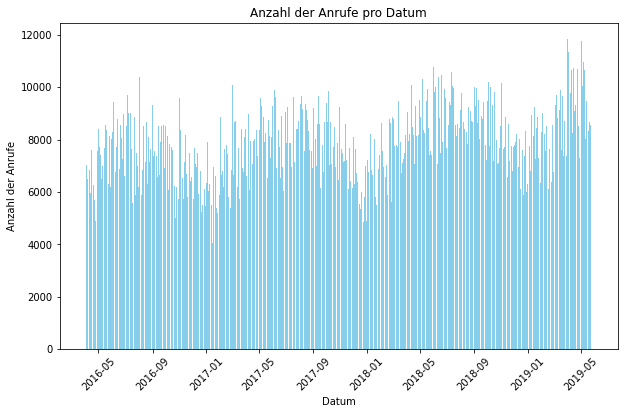

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(data['date'], data['calls'], color='skyblue')

# Füge Titel und Achsenbeschriftungen hinzu
plt.title('Anzahl der Anrufe pro Datum')
plt.xlabel('Datum')
plt.ylabel('Anzahl der Anrufe')

# Dreh die x-Achsenbeschriftungen, falls notwendig
plt.xticks(rotation=45)

# Zeige das Diagramm an
plt.show()

In [22]:
# Erstelle das Histogramm
plt.figure(figsize=(10, 6))
plt.bar(data['date'], data['n_sick'], color='skyblue')

# Füge Titel und Achsenbeschriftungen hinzu
plt.title('Anzahl der Kranken pro Datum')
plt.xlabel('Datum')
plt.ylabel('Anzahl der Kranken')

# Dreh die x-Achsenbeschriftungen, falls notwendig
plt.xticks(rotation=45)

# Zeige das Diagramm an
plt.show()

NameError: name 'plt' is not defined

In [23]:
# Erstelle eine neue Spalte für die Wochentage
data['weekday'] = data['date'].dt.day_name()

# Aggregiere die Daten nach Wochentagen und berechne den Durchschnitt
aggregated_data = data.groupby('weekday').mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
# Erstelle das Diagramm mit zwei y-Achsen
fig, ax1 = plt.subplots(figsize=(12, 6))

# Breite der Balken
bar_width = 0.35

# Positionen der Balken auf der x-Achse
r1 = range(len(aggregated_data))

# Erstelle die Balken für die Anzahl der Kranken
bars1 = ax1.bar(r1, aggregated_data['n_sick'], color='blue', width=bar_width, edgecolor='grey', label='n_sick')

# Konfiguriere die erste y-Achse
ax1.set_xlabel('Wochentag', fontweight='bold')
ax1.set_ylabel('Durchschnittliche Anzahl der Kranken', color='blue', fontweight='bold')
ax1.set_title('Durchschnittliche Anzahl der Kranken und Anrufe pro Wochentag')
ax1.set_xticks([r for r in range(len(aggregated_data))])
ax1.set_xticklabels(['Montag', 'Dienstag', 'Mittwoch', 'Donnerstag', 'Freitag', 'Samstag', 'Sonntag'])

# Beschrifte die Balken für die Anzahl der Kranken
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2.0, yval, round(yval, 2), va='bottom', ha='center', color='blue')

# Erstelle eine zweite y-Achse
ax2 = ax1.twinx()

# Erstelle die Balken für die Anzahl der Anrufe
bars2 = ax2.bar([r + bar_width for r in r1], aggregated_data['calls'], color='red', width=bar_width, edgecolor='grey', label='calls')

# Konfiguriere die zweite y-Achse
ax2.set_ylabel('Durchschnittliche Anzahl der Anrufe', color='red', fontweight='bold')

# Beschrifte die Balken für die Anzahl der Anrufe
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2.0, yval, round(yval, 2), va='bottom', ha='center', color='red')

# Zeige die Legenden
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))

# Zeige das Diagramm an
plt.show()

NameError: name 'plt' is not defined

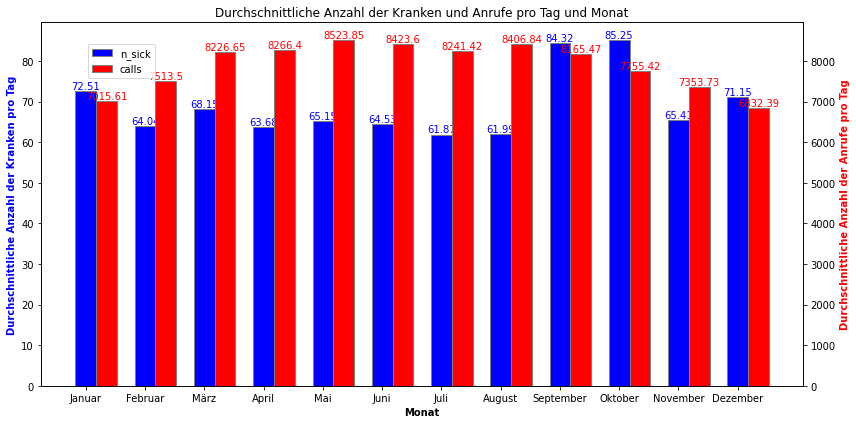

In [13]:
# Erstelle eine neue Spalte für die Monatsnamen
data['month'] = data['date'].dt.month_name()

# Berechne den Tagesdurchschnitt der Kranken und Anrufe pro Monat
daily_averages = data.groupby('month').mean().reindex(
    ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
)
# Erstelle das Diagramm mit zwei y-Achsen
fig, ax1 = plt.subplots(figsize=(12, 6))

# Breite der Balken
bar_width = 0.35

# Positionen der Balken auf der x-Achse
r1 = range(len(daily_averages))

# Erstelle die Balken für die Anzahl der Kranken
bars1 = ax1.bar(r1, daily_averages['n_sick'], color='blue', width=bar_width, edgecolor='grey', label='n_sick')

# Konfiguriere die erste y-Achse
ax1.set_xlabel('Monat', fontweight='bold')
ax1.set_ylabel('Durchschnittliche Anzahl der Kranken pro Tag', color='blue', fontweight='bold')
ax1.set_title('Durchschnittliche Anzahl der Kranken und Anrufe pro Tag und Monat')
ax1.set_xticks([r for r in range(len(daily_averages))])
ax1.set_xticklabels(['Januar', 'Februar', 'März', 'April', 'Mai', 'Juni', 'Juli', 'August', 'September', 'Oktober', 'November', 'Dezember'])

# Beschrifte die Balken für die Anzahl der Kranken
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2.0, yval, round(yval, 2), va='bottom', ha='center', color='blue')

# Erstelle eine zweite y-Achse
ax2 = ax1.twinx()

# Erstelle die Balken für die Anzahl der Anrufe
bars2 = ax2.bar([r + bar_width for r in r1], daily_averages['calls'], color='red', width=bar_width, edgecolor='grey', label='calls')

# Konfiguriere die zweite y-Achse
ax2.set_ylabel('Durchschnittliche Anzahl der Anrufe pro Tag', color='red', fontweight='bold')

# Beschrifte die Balken für die Anzahl der Anrufe
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2.0, yval, round(yval, 2), va='bottom', ha='center', color='red')

# Zeige die Legenden
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))

# Zeige das Diagramm an
plt.show()

In [24]:
# Liste der Feiertage
feiertage = [
    '2016-03-28', '2016-05-01', '2016-05-05', '2016-05-16', '2016-10-03', '2016-12-25', '2016-12-26',
    '2017-01-01', '2017-04-14', '2017-04-17', '2017-05-01', '2017-05-25', '2017-06-05', '2017-10-03',
    '2017-10-31', '2017-12-25', '2017-12-16', '2018-01-01', '2018-03-30', '2018-04-02', '2018-05-01',
    '2018-05-10', '2018-05-21', '2018-10-03', '2018-12-25', '2018-12-26', '2019-01-01', '2019-03-08',
    '2019-04-19', '2019-04-22', '2019-05-01', '2019-05-30', '2019-06-10', '2019-10-03', '2019-12-25',
    '2019-12-26'
]

# Konvertiere die Liste der Feiertage in ein Datetime-Format
feiertage = pd.to_datetime(feiertage)

# Füge die Spalte "Feiertage" hinzu
data['Feiertage'] = data['date'].isin(feiertage)

# Schritt 2: Berechne die durchschnittlichen Werte für Feiertage und Nicht-Feiertage

# Berechne die Mittelwerte
average_values = data.groupby('Feiertage').mean()[['calls', 'n_sick']]

# Erstelle das Diagramm mit zwei y-Achsen
fig, ax1 = plt.subplots(figsize=(10, 6))

# Breite der Balken
bar_width = 0.35

# Positionen der Balken auf der x-Achse
r = range(len(average_values))

# Erstelle die Balken für die Anzahl der Kranken (linke y-Achse)
bars1 = ax1.bar(r, average_values['n_sick'], color='blue', width=bar_width, edgecolor='grey', label='n_sick')

# Konfiguriere die linke y-Achse
ax1.set_xlabel('Feiertag')
ax1.set_ylabel('Durchschnittliche Anzahl der Krankheitsfälle', color='blue', fontweight='bold')
ax1.set_title('Durchschnittliche Anzahl der Krankheitsfälle und Anrufe an Feiertagen und Nicht-Feiertagen')
ax1.set_xticks([x + bar_width / 2 for x in r])
ax1.set_xticklabels(['Nicht-Feiertag', 'Feiertag'])
ax1.tick_params(axis='y', labelcolor='blue')

# Beschrifte die Balken für die Anzahl der Kranken
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2.0, yval, round(yval, 2), va='bottom', ha='center', color='blue')

# Erstelle eine zweite y-Achse für die Anzahl der Anrufe (rechte y-Achse)
ax2 = ax1.twinx()

# Erstelle die Balken für die Anzahl der Anrufe (rechte y-Achse)
bars2 = ax2.bar([x + bar_width for x in r], average_values['calls'], color='red', width=bar_width, edgecolor='grey', label='calls')

# Konfiguriere die rechte y-Achse
ax2.set_ylabel('Durchschnittliche Anzahl der Anrufe', color='red', fontweight='bold')
ax2.tick_params(axis='y', labelcolor='red')

# Beschrifte die Balken für die Anzahl der Anrufe
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2.0, yval, round(yval, 2), va='bottom', ha='center', color='red')

# Zeige die Legenden
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Zeige das Diagramm an
plt.show()

NameError: name 'plt' is not defined

In [5]:
#Installiere und importiere die notwendigen Bibliotheken
!pip install pandas

import pandas as pd

# Lade die CSV-Datei in ein DataFrame
data = pd.read_csv('/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/raw/sickness_table.csv')

# Konvertiere die Spalten zu Integer (falls notwendig)
data['n_sick'] = data['n_sick'].astype(float).astype(int)
data['calls'] = data['calls'].astype(float).astype(int)

# Berechne Mittelwert, Min, Max, Varianz und Standardabweichung für 'n_sick'
n_sick_mean = round(data['n_sick'].mean(), 1)
n_sick_min = round(data['n_sick'].min(), 1)
n_sick_max = round(data['n_sick'].max(), 1)
n_sick_variance = round(data['n_sick'].var(), 1)
n_sick_std_dev = round(data['n_sick'].std(), 1)

# Berechne Mittelwert, Min, Max, Varianz und Standardabweichung für 'calls'
calls_mean = round(data['calls'].mean(), 1)
calls_min = round(data['calls'].min(), 1)
calls_max = round(data['calls'].max(), 1)
calls_variance = round(data['calls'].var(), 1)
calls_std_dev = round(data['calls'].std(), 1)

# Erstelle ein DataFrame zur Darstellung der Ergebnisse
statistics = pd.DataFrame({
    'Statistik': ['Mittelwert', 'Minimum', 'Maximum', 'Varianz', 'Standardabweichung'],
    'n_sick': [n_sick_mean, n_sick_min, n_sick_max, n_sick_variance, n_sick_std_dev],
    'calls': [calls_mean, calls_min, calls_max, calls_variance, calls_std_dev]
})

# Zeige die Ergebnisse an
print(statistics)


[notice] A new release of pip available: 22.3.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
            Statistik  n_sick      calls
0          Mittelwert    68.8     7919.5
1             Minimum    36.0     4074.0
2             Maximum   119.0    11850.0
3             Varianz   204.3  1664264.0
4  Standardabweichung    14.3     1290.1


In [27]:
print(data.head())
# Liste der Feiertage
feiertage = [
    '2016-03-28', '2016-05-01', '2016-05-05', '2016-05-16', '2016-10-03', '2016-12-25', '2016-12-26',
    '2017-01-01', '2017-04-14', '2017-04-17', '2017-05-01', '2017-05-25', '2017-06-05', '2017-10-03',
    '2017-10-31', '2017-12-25', '2017-12-16', '2018-01-01', '2018-03-30', '2018-04-02', '2018-05-01',
    '2018-05-10', '2018-05-21', '2018-10-03', '2018-12-25', '2018-12-26', '2019-01-01', '2019-03-08',
    '2019-04-19', '2019-04-22', '2019-05-01', '2019-05-30', '2019-06-10', '2019-10-03', '2019-12-25',
    '2019-12-26'
]

# Konvertiere die Liste der Feiertage in ein Datetime-Format
feiertage = pd.to_datetime(feiertage)

# Füge die Spalte "Feiertage" hinzu
data['Feiertage'] = data['date'].isin(feiertage)
print(data.head())

   Unnamed: 0       date  n_sick  calls  n_duty  n_sby  sby_need  dafted  \
0           0 2016-04-01      73   8154    1700     90      8154    8154   
1           1 2016-04-02      64   8526    1700     90      8526    8526   
2           2 2016-04-03      68   8088    1700     90      8088    8088   
3           3 2016-04-04      71   7044    1700     90      7044    7044   
4           4 2016-04-05      63   7236    1700     90      7236    7236   

    weekday  Feiertage  
0    Friday      False  
1  Saturday      False  
2    Sunday      False  
3    Monday      False  
4   Tuesday      False  
   Unnamed: 0       date  n_sick  calls  n_duty  n_sby  sby_need  dafted  \
0           0 2016-04-01      73   8154    1700     90      8154    8154   
1           1 2016-04-02      64   8526    1700     90      8526    8526   
2           2 2016-04-03      68   8088    1700     90      8088    8088   
3           3 2016-04-04      71   7044    1700     90      7044    7044   
4           4

In [33]:
# Deskriptive Statistik
print("Deskriptive Statistik:")
print("Einfluss auf die Variable n_sick:")
print(data.groupby('Feiertage')['n_sick'].describe())

# T-Test
holiday_data = data[data['Feiertage'] == True]['n_sick']
non_holiday_data = data[data['Feiertage'] == False]['n_sick']

t_stat, p_val = stats.ttest_ind(holiday_data, non_holiday_data)
print(f"\nT-Test: t-stat={t_stat}, p-val={p_val}")

# Interpretation des p-Werts
alpha = 0.05
if p_val < alpha:
    print("Das Attribut Feiertage beeinflusst die Zielvariable signifikant (Nullhypothese wird abgelehnt).")
else:
    print("Das Attribut Feiertage beeinflusst die Zielvariable nicht signifikant (Nullhypothese kann nicht abgelehnt werden).")

Deskriptive Statistik:
Einfluss auf die Variable n_sick:
            count       mean        std   min    25%   50%    75%    max
Feiertage                                                               
False      1122.0  68.907308  14.331004  36.0  58.00  68.0  78.75  119.0
True         30.0  65.100000  12.479915  50.0  56.25  60.5  72.75   94.0

T-Test: t-stat=-1.4404545509513211, p-val=0.15001102682910755
Das Attribut Feiertage beeinflusst die Zielvariable nicht signifikant (Nullhypothese kann nicht abgelehnt werden).


In [31]:
# Deskriptive Statistik
print("Deskriptive Statistik:")
print("Einfluss auf die Variable calls:")
print(data.groupby('Feiertage')['calls'].describe())

# T-Test
holiday_data = data[data['Feiertage'] == True]['n_sick']
non_holiday_data = data[data['Feiertage'] == False]['n_sick']

t_stat, p_val = stats.ttest_ind(holiday_data, non_holiday_data)
print(f"\nT-Test: t-stat={t_stat}, p-val={p_val}")

# Interpretation des p-Werts
alpha = 0.05
if p_val < alpha:
    print("Das Attribut Feiertage beeinflusst die Zielvariable signifikant (Nullhypothese wird abgelehnt).")
else:
    print("Das Attribut Feiertage beeinflusst die Zielvariable nicht signifikant (Nullhypothese kann nicht abgelehnt werden).")

Deskriptive Statistik:
Einfluss auf die Variable calls:
            count         mean          std     min     25%     50%     75%  \
Feiertage                                                                     
False      1122.0  7907.935829  1291.387071  4074.0  6978.0  7908.0  8814.0   
True         30.0  8353.200000  1178.910262  6030.0  7638.0  8463.0  9048.0   

               max  
Feiertage           
False      11850.0  
True       10494.0  

T-Test: t-stat=-1.4404545509513211, p-val=0.15001102682910755
Das Attribut Feiertage beeinflusst die Zielvariable nicht signifikant (Nullhypothese kann nicht abgelehnt werden).
